<a href="https://colab.research.google.com/github/sushma410/Mental-Health-Prediction/blob/main/Mental%20Health%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data inputing

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/DA/mental_health.csv")
data.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [ ]:
data.dtypes

text     object
label     int64
dtype: object

In [ ]:
data["label"].unique()

array([0, 1])

In [ ]:
msg=data.text
msg

0        dear american teens question dutch person hear...
1        nothing look forward lifei dont many reasons k...
2        music recommendations im looking expand playli...
3        im done trying feel betterthe reason im still ...
4        worried  year old girl subject domestic physic...
                               ...                        
27972    posting everyday people stop caring  religion ...
27973    okay definetly need hear guys opinion ive pret...
27974    cant get dog think ill kill myselfthe last thi...
27975    whats point princess bridei really think like ...
27976    got nudes person might might know snapchat do ...
Name: text, Length: 27977, dtype: object

In [ ]:
msg=msg.str.replace('[^a-zA-Z0-9]+'," ")
msg

0        dear american teens question dutch person hear...
1        nothing look forward lifei dont many reasons k...
2        music recommendations im looking expand playli...
3        im done trying feel betterthe reason im still ...
4        worried  year old girl subject domestic physic...
                               ...                        
27972    posting everyday people stop caring  religion ...
27973    okay definetly need hear guys opinion ive pret...
27974    cant get dog think ill kill myselfthe last thi...
27975    whats point princess bridei really think like ...
27976    got nudes person might might know snapchat do ...
Name: text, Length: 27977, dtype: object

In [ ]:
text_corpus = ' '.join(data['text'].values)

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

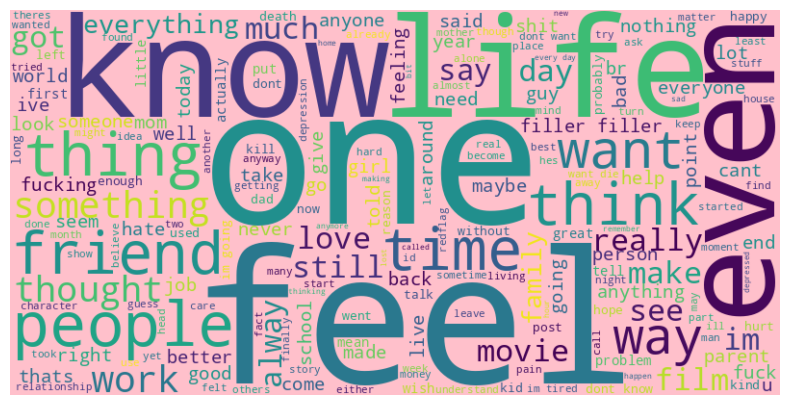

In [ ]:
 #Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='pink').generate(text_corpus)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:

import nltk
from nltk.stem import PorterStemmer
nltk.download("punkt")
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
stemmer=PorterStemmer()
msg=msg.apply(lambda line:[stemmer.stem(token.lower()) for token in word_tokenize(line)]).apply(lambda token:" ".join(token))

In [ ]:
msg=msg.apply(lambda line:[token for token in word_tokenize(line) if len(token)>2]).apply(lambda y:" ".join(y))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
data_vec=tf.fit_transform(msg)
print(data_vec)

  (0, 29298)	0.21987335376865433
  (0, 39982)	0.11542773806418838
  (0, 27535)	0.07087011507761481
  (0, 19399)	0.32470250783624194
  (0, 47933)	0.372419638753305
  (0, 44123)	0.33639795722210636
  (0, 936)	0.16631805303177513
  (0, 26996)	0.33555630114030005
  (0, 47494)	0.09441474711962639
  (0, 13703)	0.19490088675448736
  (0, 52123)	0.10351927938950346
  (0, 18562)	0.07760461136099839
  (0, 20133)	0.2557670702200546
  (0, 20981)	0.1825297804935439
  (0, 35727)	0.11664502599696015
  (0, 13554)	0.30463028499702755
  (0, 38145)	0.1590745553723292
  (0, 46841)	0.19902012880657122
  (0, 1704)	0.20149949431691566
  (0, 11058)	0.24791849091720664
  (1, 31738)	0.20058092375972741
  (1, 20495)	0.27095666506100075
  (1, 51894)	0.12561824585016856
  (1, 28844)	0.15213638236772406
  (1, 10868)	0.16056417535186107
  :	:
  (27976, 33256)	0.43157692706403256
  (27976, 43636)	0.2111327975386876
  (27976, 30298)	0.34846311827534304
  (27976, 23409)	0.12449187696439876
  (27976, 43632)	0.17897635439

In [ ]:
y=data['label'].values
y

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_vec,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
sv=SVC()
# nb=GaussianNB()
rf=RandomForestClassifier()
ab= AdaBoostClassifier()
models=[sv,rf,ab]
for model in models:
  print(model)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(classification_report(y_test,y_pred))

SVC()
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4252
           1       0.94      0.89      0.91      4142

    accuracy                           0.92      8394
   macro avg       0.92      0.92      0.92      8394
weighted avg       0.92      0.92      0.92      8394

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      4252
           1       0.90      0.89      0.89      4142

    accuracy                           0.89      8394
   macro avg       0.89      0.89      0.89      8394
weighted avg       0.89      0.89      0.89      8394

AdaBoostClassifier()
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4252
           1       0.91      0.83      0.87      4142

    accuracy                           0.87      8394
   macro avg       0.88      0.87      0.87      8394
weighted avg       0.8

In [ ]:
# Assuming model is already loaded and tf is the TfidfVectorizer used during training
input_text = ["hi"]
X_input = tf.transform(input_text)
y_new = model.predict(X_input)

print("Predictions:", y_new)  # Print raw predictions for debugging

# Assuming y_new contains only one prediction
if y_new[0] == 1:
    print("Predicted sentiment: positive")
elif y_new[0] == 0:
    print("Predicted sentiment: negative")
else:
    print("Invalid prediction")


Predictions: [0]
Predicted sentiment: negative


<Axes: xlabel='label', ylabel='count'>

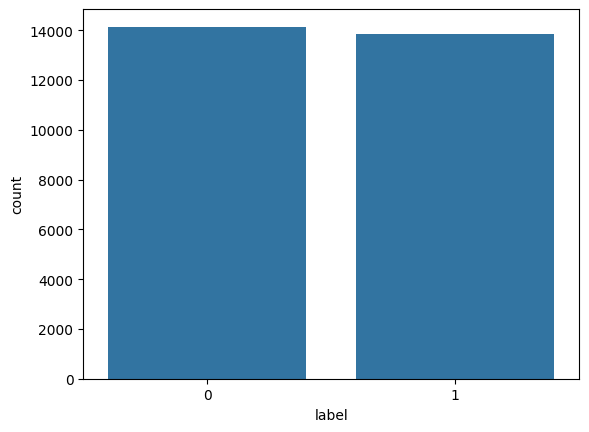

In [ ]:
sns.countplot(data=data,x="label")

# Input other libraries and necessary files

In [ ]:
import re
import nltk

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Lemmatizer

In [ ]:
lemmatize=nltk.WordNetLemmatizer()

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('wordnet')
texts=[]
for i in data.text:
    text=re.sub("[^a-zA-Z]"," ",i) # it removes unalfabetic signs
    text=nltk.word_tokenize(text,language="english") # it tokenizes our words
    text=[lemmatize.lemmatize(word) for word in text] # it lemmatizes our words
    text=" ".join(text) # Make our tokenize into sentences
    texts.append(text) #appending to list

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count=CountVectorizer(stop_words="english",max_features=550)#it removes unnecesarry words and finds most using 550 words

In [ ]:
matrix=count.fit_transform(texts).toarray() # it crates a matrix and we must transform it to a array otherwise our algorithm does not work.

# Set X and Y

In [ ]:
x=matrix
y=data["sentiment"].values

# Train Test Split

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)


In [ ]:
pip install scikit-plot

In [ ]:
from scikitplot.metrics import plot_confusion_matrix, plot_roc

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from scikitplot.metrics import plot_confusion_matrix, plot_roc

def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred), 3)

    print(f'Accuracy of the model: {accuracy}')
    print(f'Precision Score of the model: {precision}')
    print(f'Recall Score of the model: {recall}')
    print(f'F1 Score of the model: {f1}')

    sns.set_context('notebook', font_scale=1.3)
    fig, ax = plt.subplots(1, 2, figsize=(25, 8))
    ax1 = plot_confusion_matrix(y_test, y_pred, ax=ax[0], cmap='YlGnBu')
    ax2 = plot_roc(y_test, y_prob, ax=ax[1], plot_macro=False, plot_micro=False, cmap='summer')


Accuracy of the model: 0.81
Precision Score of the model: 0.797
Recall Score of the model: 0.821
F1 Score of the model: 0.809


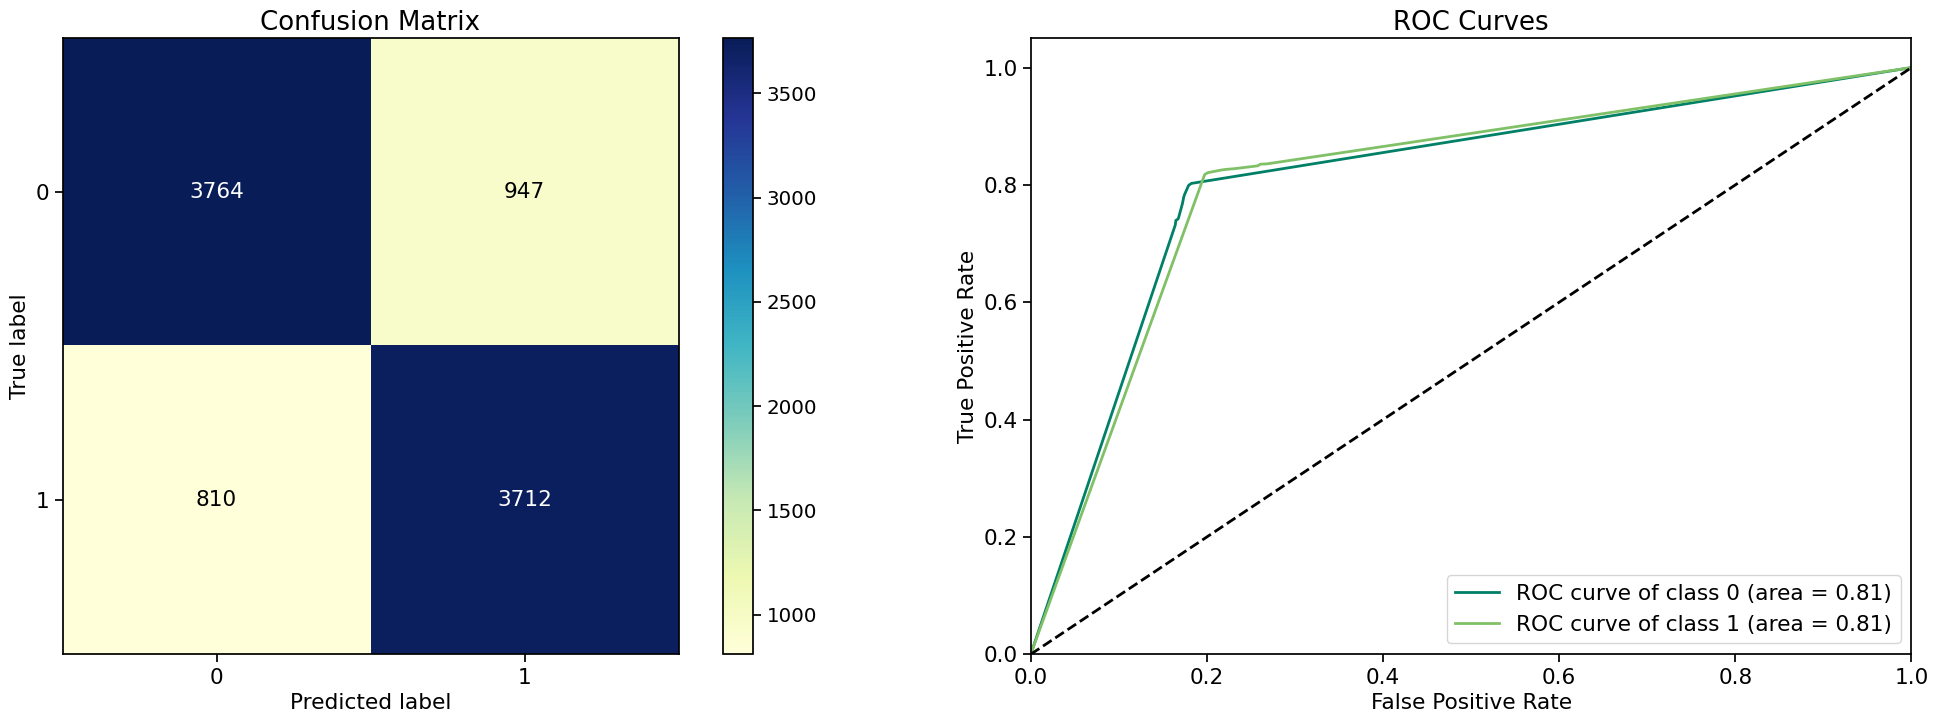

In [ ]:
decision_tree = DecisionTreeClassifier()
train_model(decision_tree)

Accuracy of the model: 0.819
Precision Score of the model: 0.896
Recall Score of the model: 0.714
F1 Score of the model: 0.794


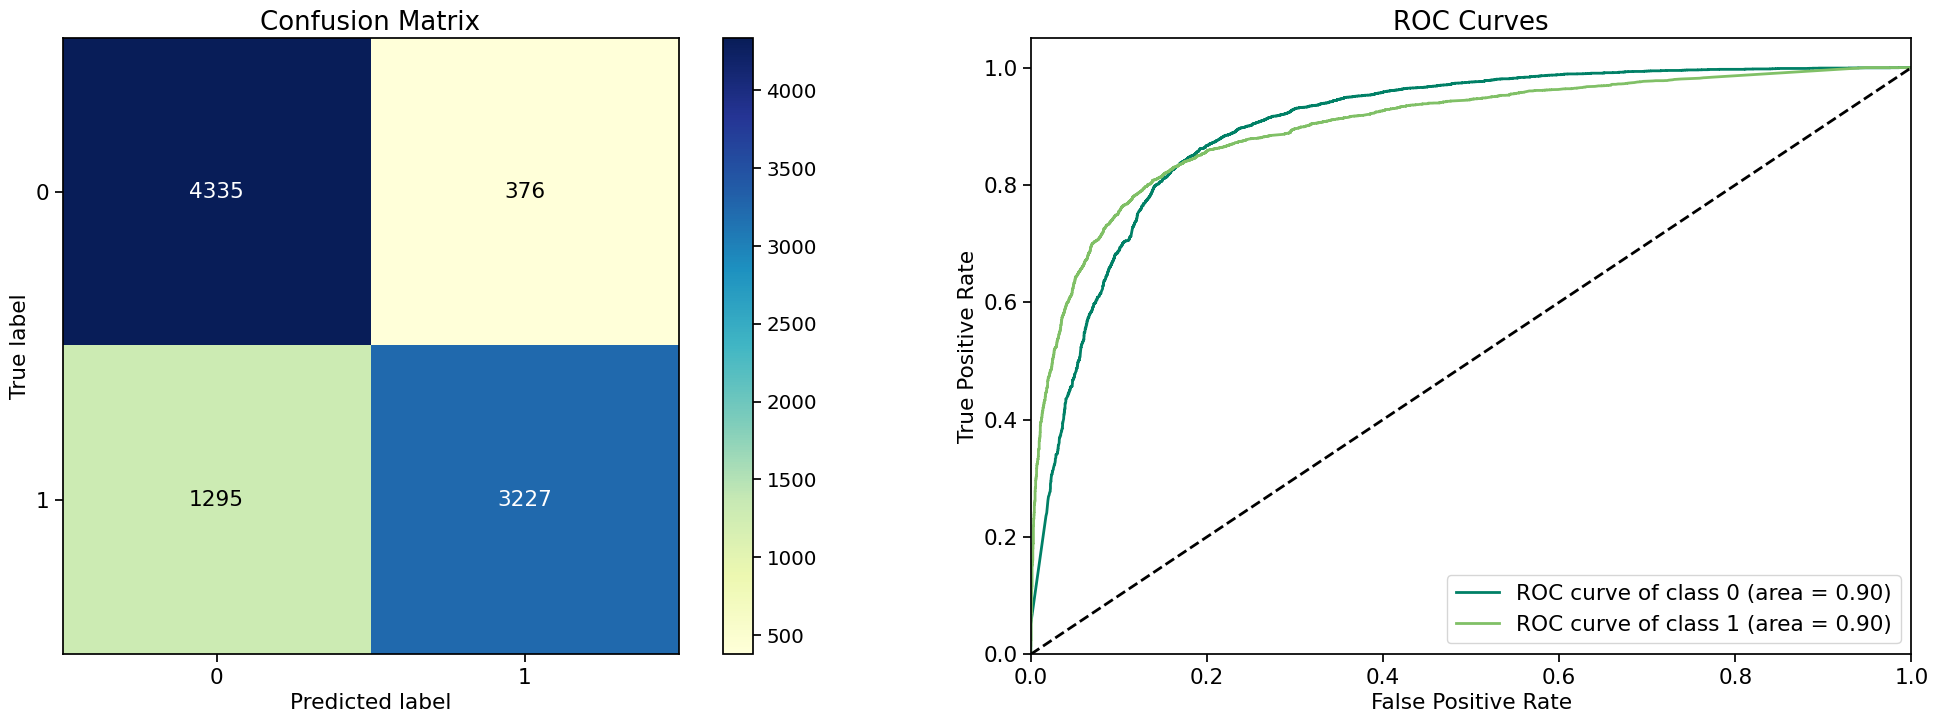

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=3, n_jobs=-1, random_state=42)
train_model(rnd_clf)

Accuracy of the model: 0.699
Precision Score of the model: 0.944
Recall Score of the model: 0.41
F1 Score of the model: 0.571


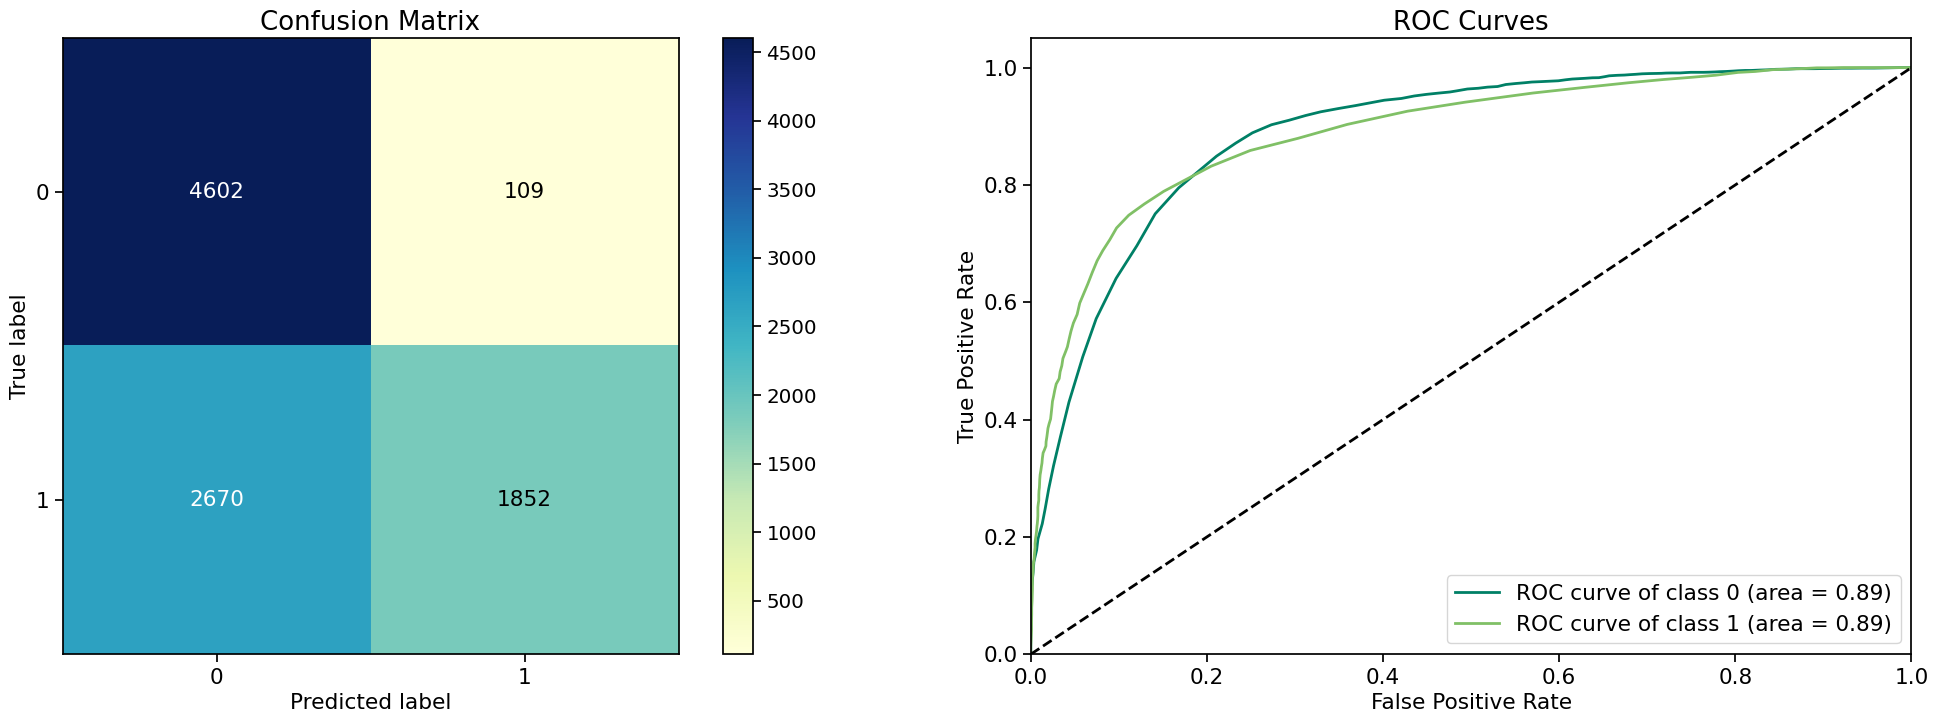

In [ ]:
kneighbors_lassifier = KNeighborsClassifier(n_neighbors=100)
train_model(kneighbors_lassifier)

Accuracy of the model: 0.878
Precision Score of the model: 0.929
Recall Score of the model: 0.813
F1 Score of the model: 0.867


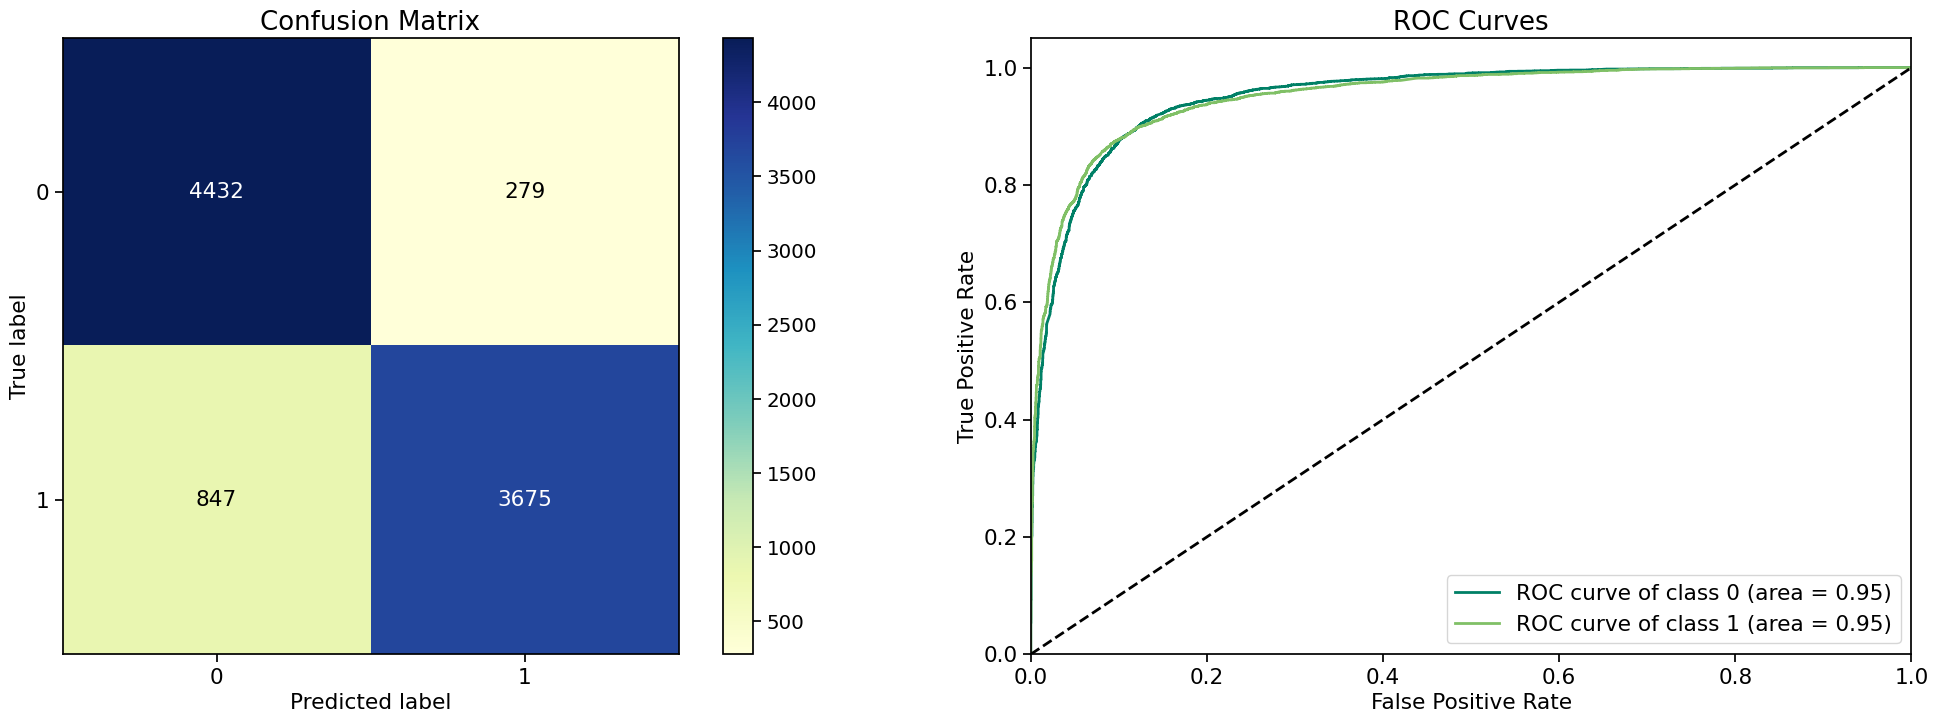

In [ ]:
svc = SVC(gamma='auto', probability=True)
train_model(svc)

Accuracy of the model: 0.801
Precision Score of the model: 0.879
Recall Score of the model: 0.689
F1 Score of the model: 0.772


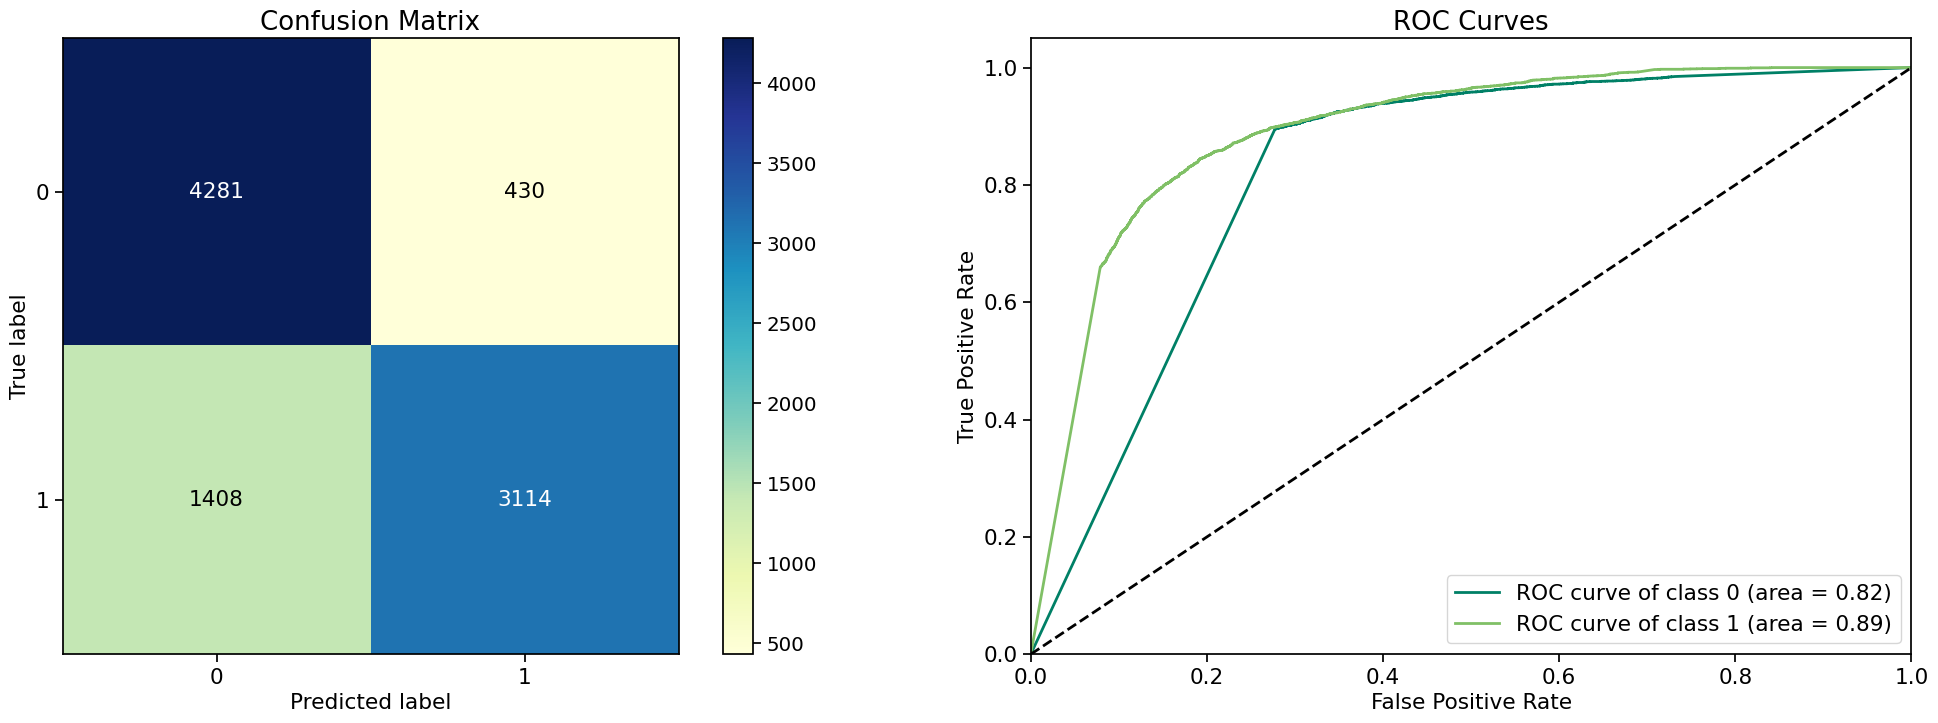

In [ ]:
gaussian_nb = GaussianNB()
train_model(gaussian_nb)

Accuracy of the model: 0.82
Precision Score of the model: 0.858
Recall Score of the model: 0.758
F1 Score of the model: 0.805


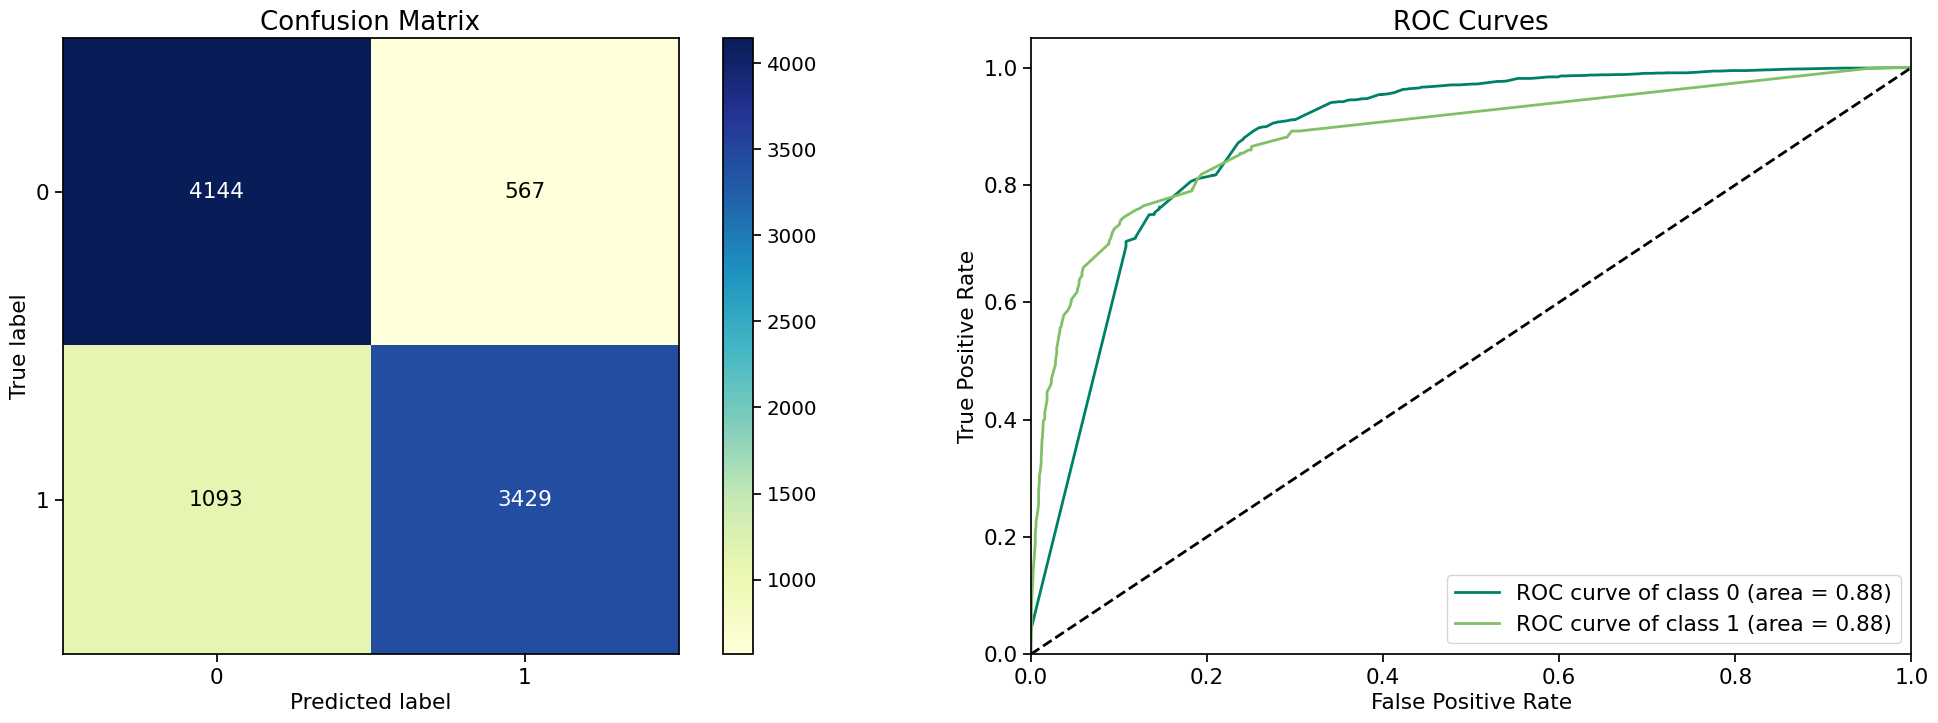

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=10, random_state=42)
train_model(gb_model)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from scikitplot.metrics import plot_confusion_matrix, plot_roc

def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred), 3)

    print(f'Accuracy of the model: {accuracy}')
    print(f'Precision Score of the model: {precision}')
    print(f'Recall Score of the model: {recall}')
    print(f'F1 Score of the model: {f1}')

    sns.set_context('notebook', font_scale=1.3)
    fig, ax = plt.subplots(1, 2, figsize=(25, 8))
    ax1 = plot_confusion_matrix(y_test, y_pred, ax=ax[0], cmap='YlGnBu')
    ax2 = plot_roc(y_test, y_prob, ax=ax[1], plot_macro=False, plot_micro=False, cmap='summer')


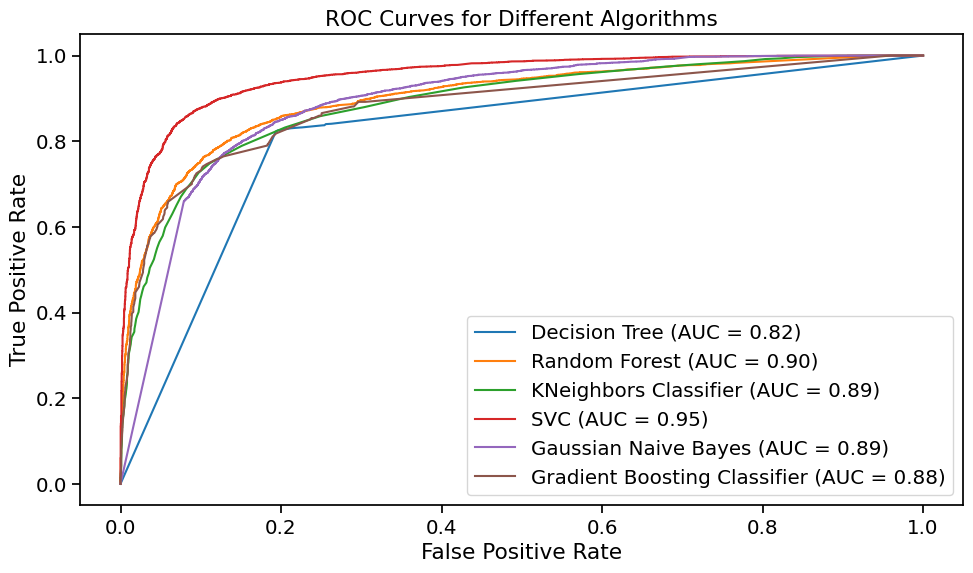

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from scikitplot.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

# Generate some sample data
# Assuming you have X_train, X_test, y_train, and y_test defined somewhere
# X_train, X_test, y_train, y_test = ...

def train_model(model, model_name):
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model_name, roc_auc))

plt.figure(figsize=(10, 6))  # Adjust width and height as needed

# Plot ROC curves
decision_tree = DecisionTreeClassifier()
train_model(decision_tree, "Decision Tree")

rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=3, n_jobs=-1, random_state=42)
train_model(rnd_clf, "Random Forest")

kneighbors_classifier = KNeighborsClassifier(n_neighbors=100)
train_model(kneighbors_classifier, "KNeighbors Classifier")

svc = SVC(gamma='auto', probability=True)
train_model(svc, "SVC")

gaussian_nb = GaussianNB()
train_model(gaussian_nb, "Gaussian Naive Bayes")

gb_model = GradientBoostingClassifier(n_estimators=10, random_state=42)
train_model(gb_model, "Gradient Boosting Classifier")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Algorithms')
plt.legend(loc='lower right')
plt.tight_layout()  # Adjust layout
plt.show()


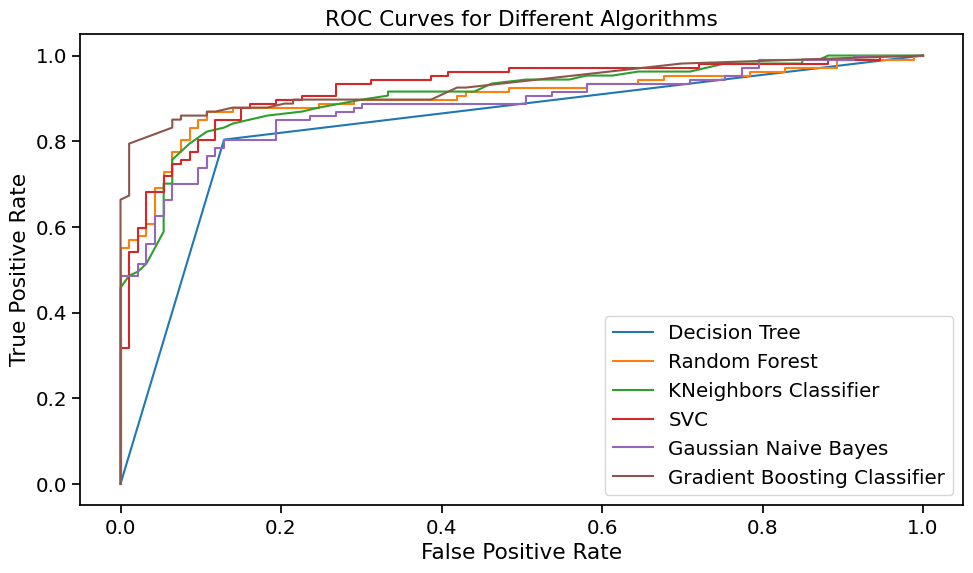

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_model(model, model_name):
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
    plt.plot(fpr, tpr, label='%s' % (model_name))

plt.figure(figsize=(10, 6))  # Adjust width and height as needed

# Plot ROC curves
decision_tree = DecisionTreeClassifier()
train_model(decision_tree, "Decision Tree")

rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=3, n_jobs=-1, random_state=42)
train_model(rnd_clf, "Random Forest")

kneighbors_classifier = KNeighborsClassifier(n_neighbors=100)
train_model(kneighbors_classifier, "KNeighbors Classifier")

svc = SVC(gamma='auto', probability=True)
train_model(svc, "SVC")

gaussian_nb = GaussianNB()
train_model(gaussian_nb, "Gaussian Naive Bayes")

gb_model = GradientBoostingClassifier(n_estimators=10, random_state=42)
train_model(gb_model, "Gradient Boosting Classifier")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Algorithms')
plt.legend(loc='lower right')
plt.tight_layout()  # Adjust layout
plt.show()

In [ ]:
# #Idea:

# 1 . https://www.researchgate.net/publication/331188558_A_Deep-dive_on_Machine_Learning_for_Cyber_Security_Use_Cases_Principles_Algorithms_and_Practices/figures?lo=1
# 2. https://www.researchgate.net/publication/370123247_Interpretable_Bangla_Sarcasm_Detection_using_BERT_and_Explainable_AI/figures?lo=1
# 3. https://www.researchgate.net/publication/376165906_TargetRNA3_predicting_prokaryotic_RNA_regulatory_targets_with_machine_learning/figures?lo=1
# 4. https://www.researchgate.net/publication/376268238_Development_of_early_prediction_model_of_in-hospital_cardiac_arrest_based_on_laboratory_parameters/figures?lo=1